🌸 IRIS FLOWER CLASSIFICATION PROJECT
 ------------------------------------
 Objective:
- Train a Machine Learning model to classify Iris flowers into Setosa, Versicolor, and Virginica based on their sepal and petal dimensions.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


✅ Dataset loaded successfully!

First 5 rows of data:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

🔹 Visualising feature relationships...


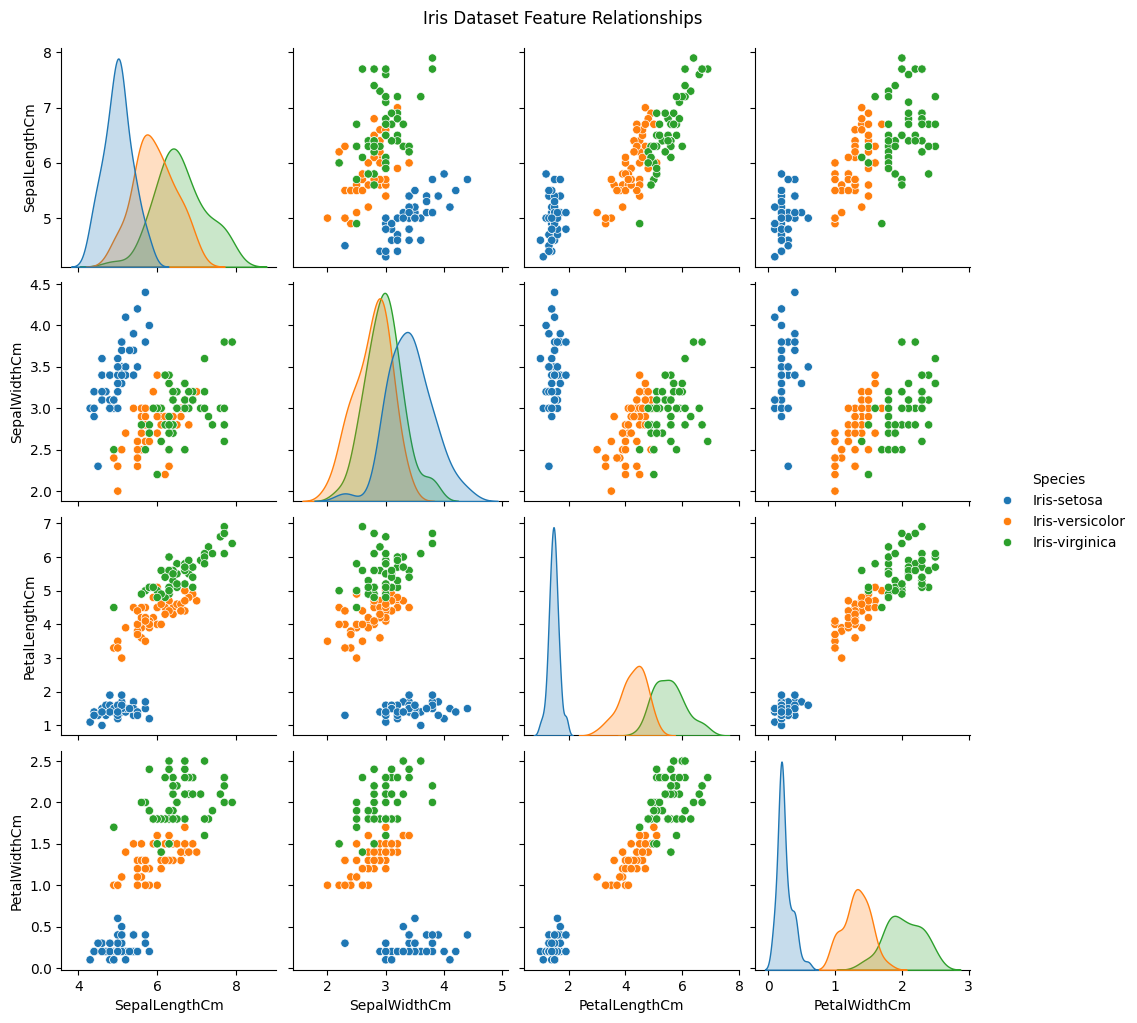


🔹 Training samples: 120, Test samples: 30

✅ Model training completed!

📊 Model Evaluation Results:
Accuracy Score: 100.0 %

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



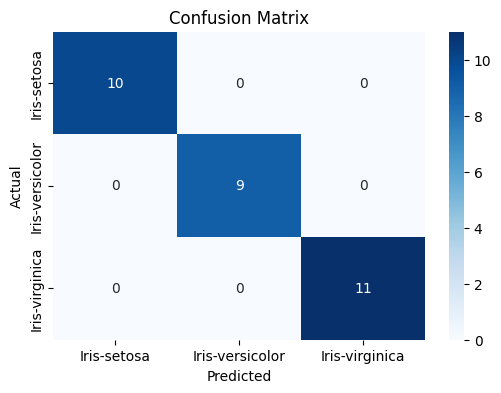

/tmp/ipython-input-3552382120.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


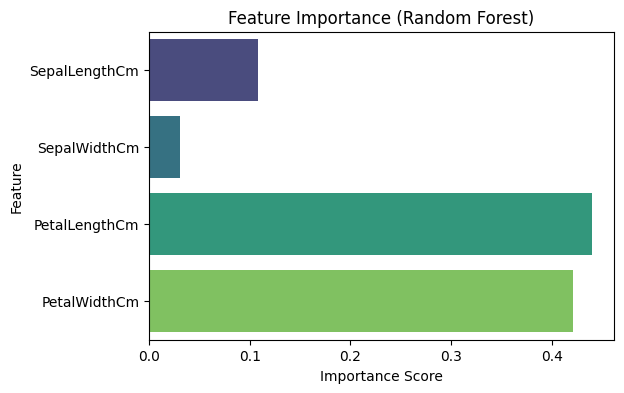


✅ SUMMARY:
- Model Used: RandomForestClassifier
- Accuracy Achieved: 100.0%
- Features with highest importance: PetalLengthCm


In [5]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Load data-set
data = pd.read_csv("Iris.csv")
print("✅ Dataset loaded successfully!")
print("\nFirst 5 rows of data:\n", data.head())

#Data pre-processing
if 'Id' in data.columns:
    data = data.drop('Id', axis=1)

# Separate features and target
X = data.drop('Species', axis=1)
y = data['Species']

# Encode target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

#Data Visualisation
print("\n🔹 Visualising feature relationships...")
sns.pairplot(data, hue="Species", diag_kind="kde")
plt.suptitle("Iris Dataset Feature Relationships", y=1.02)
plt.show()

#Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\n🔹 Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

#Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
print("\n✅ Model training completed!")

#Make predictions
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\n📊 Model Evaluation Results:")
print("Accuracy Score:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Feature Importance
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

#Summary
print("\n✅ SUMMARY:")
print(f"- Model Used: RandomForestClassifier")
print(f"- Accuracy Achieved: {round(accuracy*100, 2)}%")
print("- Features with highest importance:", feature_names[np.argmax(importances)])


